In [1]:
import numpy as np
import matplotlib.pyplot as plt
from lvl.glm.pass_glm import pass_poiss_reg

CPU times: user 97.7 ms, sys: 12.6 ms, total: 110 ms
Wall time: 53.7 ms


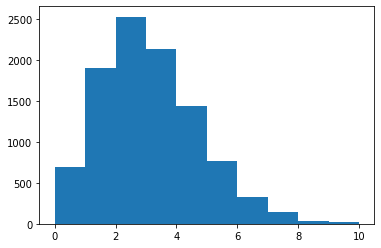

In [2]:
%%time
rs = np.random.RandomState(1234)

n_obs = 10000
n_features = 100
n_dep_vars = 1

X = 0.1 * rs.randn(n_obs, n_features)
X[:, -1] = 1.0

W_true = 0.1 * rs.randn(n_dep_vars, n_features).ravel()
W_true[-1] += 1.0 

y = rs.poisson(np.exp(X @ W_true.T)).astype(float)

_wx = X @ W_true.T
true_loss = (np.exp(_wx).sum() - (_wx * y).sum()) / n_obs

plt.hist(y, 10);

In [9]:
w, info = pass_poiss_reg(X, y, store_trace=True, max_iter=100)

0
1
2
3
4


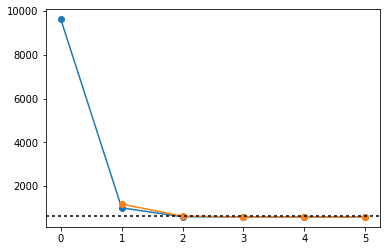

In [10]:
plt.plot(info.loss_hist, 'o-')
plt.plot(info.approx_hist, 'o-')
plt.axhline(true_loss, dashes=[2, 2], color="k")

In [ ]:
Xw = X @ w
xx = np.linspace(Xw.min(), Xw.max(), 500)
plt.plot(xx, np.exp(xx))
plt.plot(xx, a2 * xx ** 2 + a1 * xx + a0)

In [ ]:
plt.scatter(W_true, w)